Smart Home Energy Consumption Analysis (Milestone 1)

Objective:

This project focuses on analyzing device-level smart home energy consumption data
to understand usage patterns and prepare the dataset for energy consumption prediction
using machine learning models.

Module 1: Data Collection and Understanding
• Define project scope and functional objectives for smart energy analysis.
• Collect and structure the SmartHome Energy Monitoring Dataset.
• Verify data integrity, handle missing timestamps, and perform exploratory analysis.
• Organize energy readings by device, room, and timestamp.

In [2]:
from google.colab import files
files.upload()

Saving smart_home_energy_consumption_large.csv to smart_home_energy_consumption_large.csv


{'smart_home_energy_consumption_large.csv': b'Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (\xc2\xb0C),Season,Household Size\n94,Fridge,0.2,21:12,2023-12-02,-1.0,Fall,2\n435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5\n466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3\n496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1\n137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5\n68,Air Conditioning,4.68,11:36,2023-05-06,35.2,Spring,1\n237,Computer,0.25,12:05,2023-06-06,6.8,Spring,3\n329,Air Conditioning,3.5,03:34,2023-12-12,-1.0,Fall,4\n336,Dishwasher,0.89,15:22,2023-08-16,7.9,Summer,1\n310,Microwave,1.34,16:32,2023-09-19,9.3,Summer,5\n368,Oven,0.64,11:19,2023-10-19,-7.3,Fall,3\n115,Dishwasher,1.33,17:51,2023-05-17,39.0,Spring,2\n41,Microwave,0.85,19:53,2023-02-21,-7.4,Winter,3\n465,Oven,1.24,13:29,2023-11-17,20.3,Fall,5\n94,Air Conditioning,2.88,00:13,2023-05-15,2.1,Spring,1\n229,Heater,4.11,00:57,2023-04-26,-0.3,Spring,2\n360,Fridge,0.12,08:40,2023-10-24,39.8,Fall,2\n

In [3]:
import pandas as pd
df=pd.read_csv("smart_home_energy_consumption_large.csv")

In [4]:
df.head()

Home ID Appliance Type  Energy Consumption (kWh)   Time        Date  \
0       94         Fridge                      0.20  21:12  2023-12-02   
1      435           Oven                      0.23  20:11  2023-08-06   
2      466     Dishwasher                      0.32  06:39  2023-11-21   
3      496         Heater                      3.92  21:56  2023-01-21   
4      137      Microwave                      0.44  04:31  2023-08-26   

   Outdoor Temperature (°C)  Season  Household Size  
0                      -1.0    Fall               2  
1                      31.1  Summer               5  
2                      21.3    Fall               3  
3                      -4.2  Winter               1  
4                      34.5  Summer               5

### Data Inspection

Initial inspection was performed to understand the dataset structure,
column names, and data types. This step helps ensure data integrity
before applying any preprocessing or modeling techniques.


In [5]:
print(df.shape)

(100000, 8)


In [6]:
df.columns

Index(['Home ID', 'Appliance Type', 'Energy Consumption (kWh)', 'Time', 'Date',
       'Outdoor Temperature (°C)', 'Season', 'Household Size'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Home ID                   100000 non-null  int64  
 1   Appliance Type            100000 non-null  object 
 2   Energy Consumption (kWh)  100000 non-null  float64
 3   Time                      100000 non-null  object 
 4   Date                      100000 non-null  object 
 5   Outdoor Temperature (°C)  100000 non-null  float64
 6   Season                    100000 non-null  object 
 7   Household Size            100000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Appliance Type'].unique()

array(['Fridge', 'Oven', 'Dishwasher', 'Heater', 'Microwave',
       'Air Conditioning', 'Computer', 'TV', 'Washing Machine', 'Lights'],
      dtype=object)

In [10]:
df['Appliance Type'].value_counts()

Appliance Type
Lights              10201
Dishwasher          10095
Air Conditioning    10067
Heater              10018
Washing Machine      9953
Microwave            9947
Computer             9944
Oven                 9939
Fridge               9931
TV                   9905
Name: count, dtype: int64

In [11]:
df['Energy Consumption (kWh)'].describe()

count    100000.000000
mean          1.499952
std           1.181176
min           0.100000
25%           0.590000
50%           1.230000
75%           1.870000
max           5.000000
Name: Energy Consumption (kWh), dtype: float64

In [12]:
import matplotlib.pyplot as plt


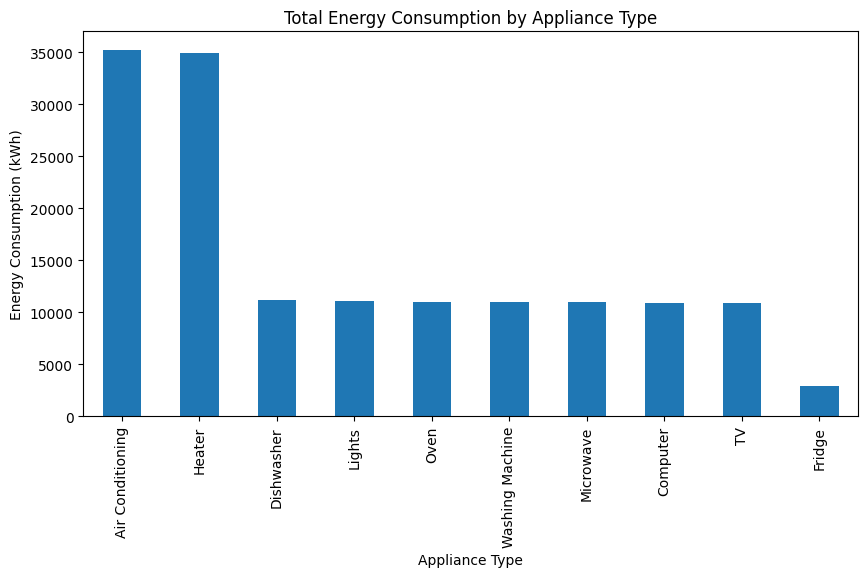

In [13]:
energy=df.groupby('Appliance Type')['Energy Consumption (kWh)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
energy.plot(kind='bar')
plt.title('Total Energy Consumption by Appliance Type')
plt.xlabel('Appliance Type')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

In [15]:
df.groupby('Appliance Type')['Energy Consumption (kWh)'].sum()


Appliance Type
Air Conditioning    35233.06
Computer            10893.63
Dishwasher          11138.51
Fridge               2961.97
Heater              34930.78
Lights              11092.12
Microwave           10951.26
Oven                10963.51
TV                  10867.97
Washing Machine     10962.35
Name: Energy Consumption (kWh), dtype: float64

In [16]:
df.groupby('Date')['Energy Consumption (kWh)'].sum()


Date
2023-01-01    466.40
2023-01-02    401.01
2023-01-03    375.64
2023-01-04    454.80
2023-01-05    460.98
               ...  
2023-12-28    378.84
2023-12-29    425.19
2023-12-30    373.69
2023-12-31    390.34
2024-01-01    399.22
Name: Energy Consumption (kWh), Length: 366, dtype: float64

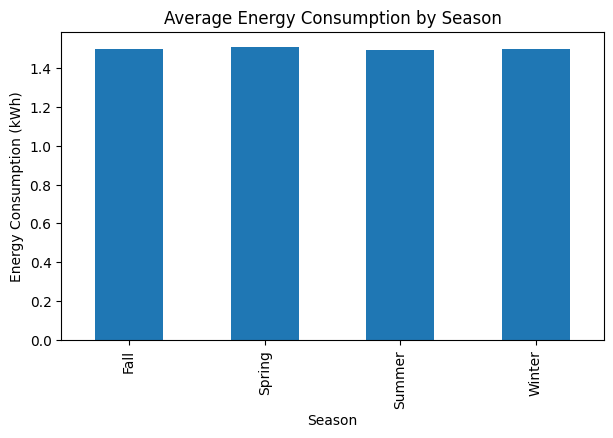

In [17]:
season_energy = (
    df.groupby('Season')['Energy Consumption (kWh)']
      .mean()
)

season_energy.plot(kind='bar', figsize=(7,4))
plt.title("Average Energy Consumption by Season")
plt.ylabel("Energy Consumption (kWh)")
plt.xlabel("Season")
plt.show()


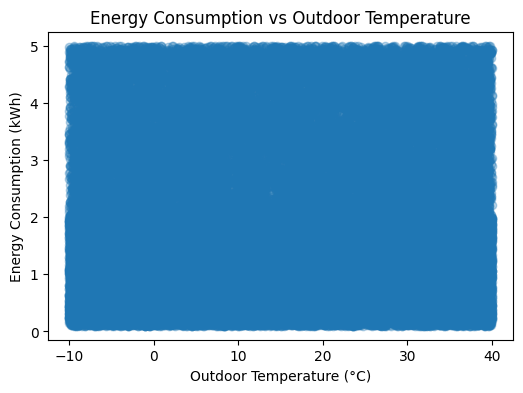

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(df['Outdoor Temperature (°C)'],
            df['Energy Consumption (kWh)'],
            alpha=0.3)

plt.xlabel("Outdoor Temperature (°C)")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption vs Outdoor Temperature")
plt.show()


### Timestamp Construction

The dataset contained separate date and time columns. These were combined
into a single datetime column to enable time-series analysis such as resampling
and forecasting.


In [19]:
df['timestamp']=pd.to_datetime(
    df['Date']+' '+df['Time']
    )

In [ ]:
df.timestamp.head()

0   2023-12-02 21:12:00
1   2023-08-06 20:11:00
2   2023-11-21 06:39:00
3   2023-01-21 21:56:00
4   2023-08-26 04:31:00
Name: timestamp, dtype: datetime64[ns]

In [20]:
df=df.drop(['Date','Time'],axis=1)
df=df.set_index('timestamp')

In [21]:
df.index.min(),df.index.max()

(Timestamp('2023-01-01 00:07:00'), Timestamp('2024-01-01 23:53:00'))

In [22]:
df.to_csv("smart_home_time.csv")

### Data Cleaning

Missing values in energy consumption readings were handled using forward fill
to preserve time continuity. This approach is commonly used in sensor-based datasets.

In [23]:
df = df.fillna(method='ffill')


/tmp/ipython-input-3984534036.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [24]:
df.head()

Home ID Appliance Type  Energy Consumption (kWh)  \
timestamp                                                               
2023-12-02 21:12:00       94         Fridge                      0.20   
2023-08-06 20:11:00      435           Oven                      0.23   
2023-11-21 06:39:00      466     Dishwasher                      0.32   
2023-01-21 21:56:00      496         Heater                      3.92   
2023-08-26 04:31:00      137      Microwave                      0.44   

                     Outdoor Temperature (°C)  Season  Household Size  
timestamp                                                              
2023-12-02 21:12:00                      -1.0    Fall               2  
2023-08-06 20:11:00                      31.1  Summer               5  
2023-11-21 06:39:00                      21.3    Fall               3  
2023-01-21 21:56:00                      -4.2  Winter               1  
2023-08-26 04:31:00                      34.5  Summer               5

In [25]:
df['Appliance Type'].nunique()

10

### Hourly and Daily Energy Aggregation

To reduce noise and analyze energy usage trends, the dataset was resampled
to an hourly level and aggregated by appliance type.


In [26]:
hourly_df=(df
           .groupby('Appliance Type')
           .resample('h')['Energy Consumption (kWh)']
           .sum()
           .reset_index()
           )

In [27]:
hourly_df.head()

Appliance Type           timestamp  Energy Consumption (kWh)
0  Air Conditioning 2023-01-01 00:00:00                      4.42
1  Air Conditioning 2023-01-01 01:00:00                      7.61
2  Air Conditioning 2023-01-01 02:00:00                     14.80
3  Air Conditioning 2023-01-01 03:00:00                      4.19
4  Air Conditioning 2023-01-01 04:00:00                     10.68

In [28]:
hourly_df.shape

(87828, 3)

In [29]:
df.duplicated().sum()

np.int64(1)

In [30]:
df=df[~df.duplicated()]

In [31]:
daily_df=(df
           .groupby('Appliance Type')
           .resample('d')['Energy Consumption (kWh)']
           .sum()
           .reset_index()
           )

In [32]:
hourly_df.to_csv("smart_home_hours.csv",index=False)
daily_df.to_csv("smart_home_daily.csv",index=False)

### Feature Scaling

Energy consumption values were normalized using Min-Max scaling
to ensure compatibility with machine learning models.


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
hourly_df['energy_scaled'] = scaler.fit_transform(
    hourly_df[['Energy Consumption (kWh)']]
)


### Train-Test Split

The dataset was split into training and testing sets for future model training.
Temporal order was preserved to prevent data leakage.


In [34]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(hourly_df, test_size=0.2, shuffle=False)

train.shape, test.shape


((70262, 4), (17566, 4))